In [25]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

credit = pd.read_csv(r'credit_card.csv')
credit.head(40)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [26]:
print ("data null \n",credit.isnull().sum())
print ("data empty \n",credit.empty)
print ("data nan \n",credit.isna().sum())

data null 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
data empty 
 False
data nan 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [27]:
df_credit = credit.drop('Customer Key', axis=1)
df_credit = df_credit.drop('Sl_No', axis=1)
df_credit.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


<Axes: >

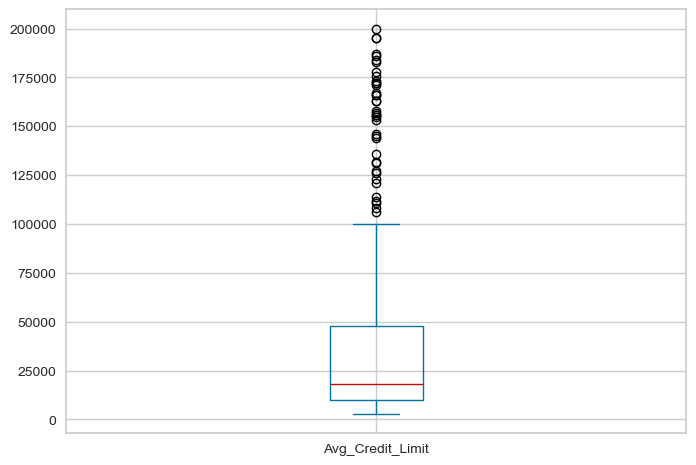

In [28]:
df_credit['Avg_Credit_Limit'].plot(kind='box')

Jumlah data sebelum dibuang outlier: 660
Jumlah data sesudah dibuang outlier: 621


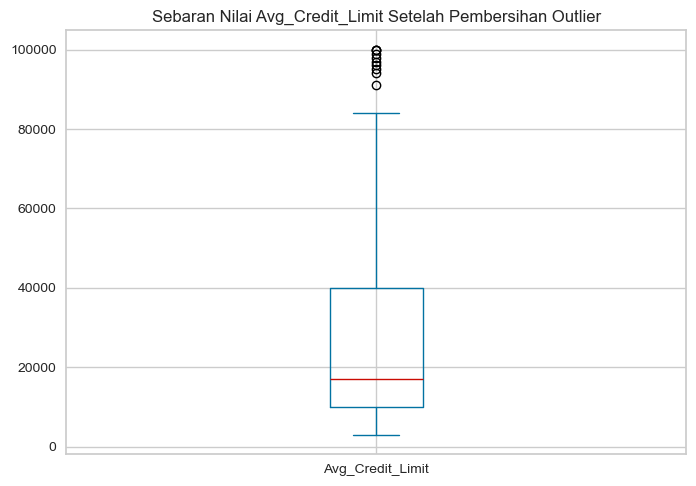

In [29]:
from pandas.api.types import is_numeric_dtype
def remove_outlier(data_frame, kolom_outlier):
    if is_numeric_dtype(data_frame[kolom_outlier]):
        Q1 = data_frame[kolom_outlier].quantile(0.25)
        Q3 = data_frame[kolom_outlier].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        data_bersih = data_frame[(data_frame[kolom_outlier] >= lower_bound) & 
                                 (data_frame[kolom_outlier] <= upper_bound)]
        return data_bersih
    else:
        print(f"Kolom {kolom_outlier} bukan tipe data numerik.")
        return data_frame

credit_clean = remove_outlier(df_credit, 'Avg_Credit_Limit')

print("Jumlah data sebelum dibuang outlier:", df_credit.shape[0])
print("Jumlah data sesudah dibuang outlier:", credit_clean.shape[0])

credit_clean['Avg_Credit_Limit'].plot(kind='box')
plt.title("Sebaran Nilai Avg_Credit_Limit Setelah Pembersihan Outlier")
plt.show()

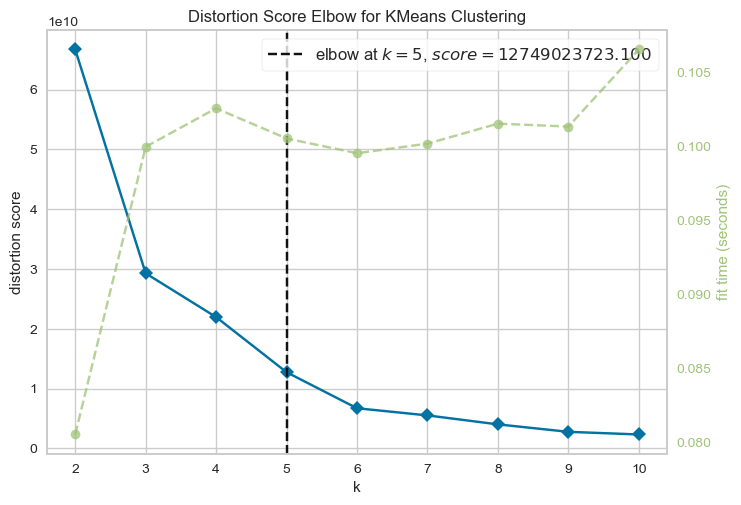

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer

kMeansC = KMeans(random_state=15)
vis = KElbowVisualizer(kMeansC, k =(2,11))
vis.fit(credit_clean)

vis.show()

Sillhouette Score K-Means for  2 clusters:  0.7275517813087928
Sillhouette Score K-Means for  3 clusters:  0.7058100919802311
Sillhouette Score K-Means for  4 clusters:  0.5928895843252326
Sillhouette Score K-Means for  5 clusters:  0.6039773808643728
Sillhouette Score K-Means for  6 clusters:  0.6277644646724014
Sillhouette Score K-Means for  7 clusters:  0.5982458585108931
Sillhouette Score K-Means for  8 clusters:  0.5918608587737609
Sillhouette Score K-Means for  9 clusters:  0.6076626138462472
Sillhouette Score K-Means for  10 clusters:  0.602252160272088


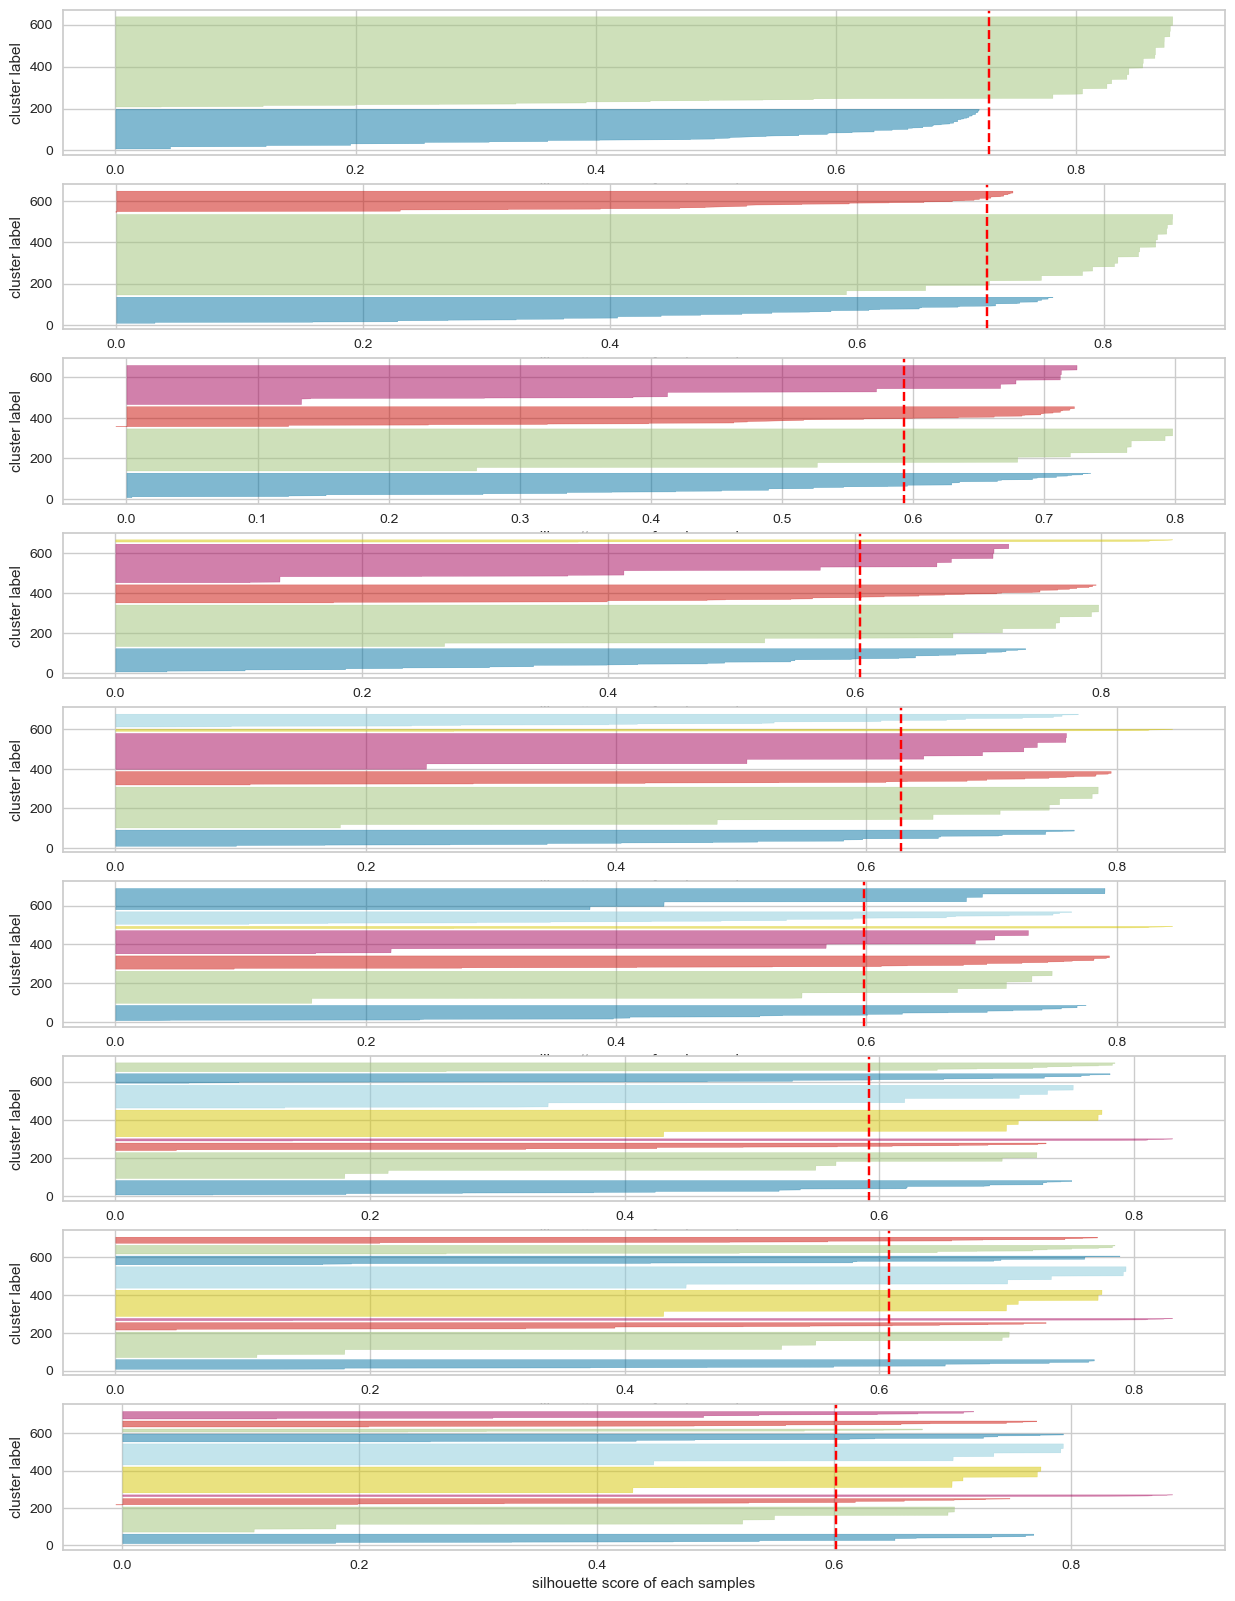

In [31]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(9,1, figsize=(15,20))

for k in np.arange(2,11):
    kMeansC = KMeans(n_clusters=k, init="k-means++",random_state=15)
    KM_clusters=kMeansC.fit_predict(credit_clean)
    print("Sillhouette Score K-Means for ", k, "clusters: ",silhouette_score(credit_clean,KM_clusters))
    
    sil_vis = SilhouetteVisualizer(kMeansC, colors = "yellowbrick", ax=ax[k-2])
    sil_vis.fit(credit_clean)
    ax[k-2].set(xlabel="silhouette score of each samples", ylabel="cluster label")

In [32]:
credit_clean.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

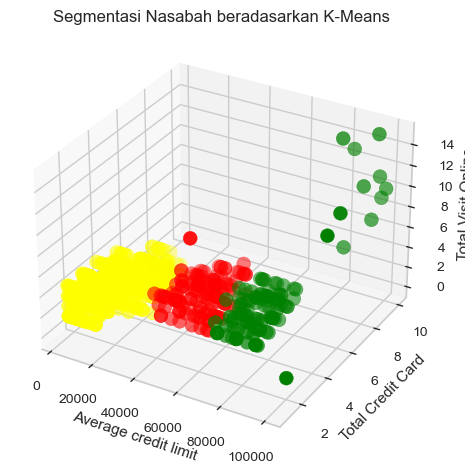

Silhouette score k-means: 0.706


In [35]:
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=15)
K_clusters = kmeans.fit_predict(credit_clean)

fig = plt.figure()
ax = plt.axes(projection='3d')

cluster_colors={0:'red',1:'yellow',2:'green',3:'blue',4:'magenta',5:'black',6:'cyan'}

ax.scatter(credit_clean['Avg_Credit_Limit'], credit_clean['Total_Credit_Cards'],credit_clean['Total_visits_online'], c=[cluster_colors[i] for i in K_clusters],s=100)

plt.title('Segmentasi Nasabah beradasarkan K-Means')
ax.set_xlabel('Average credit limit')
ax.set_ylabel('Total Credit Card')
ax.set_zlabel('Total Visit Online')
plt.show()

print("Silhouette score k-means: %0.3f" % silhouette_score(credit_clean,K_clusters))

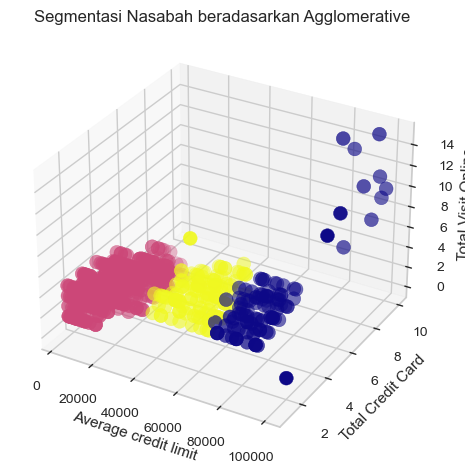

Silhouette score k-means: 0.705


In [38]:
import seaborn as sns
from matplotlib.colors import ListedColormap

AGG= AgglomerativeClustering(n_clusters=3, linkage='ward')

AGG_clusters = AGG.fit_predict(credit_clean)
cmap = ListedColormap(sns.color_palette("plasma",256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(credit_clean['Avg_Credit_Limit'], credit_clean['Total_Credit_Cards'],credit_clean['Total_visits_online'], c=AGG_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah beradasarkan Agglomerative')
ax.set_xlabel('Average credit limit')
ax.set_ylabel('Total Credit Card')
ax.set_zlabel('Total Visit Online')
plt.show()

print("Silhouette score k-means: %0.3f" % silhouette_score(credit_clean,AGG_clusters))

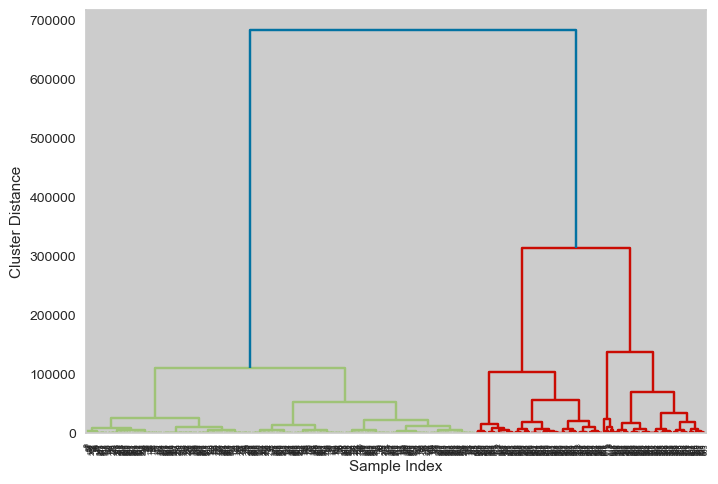

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_array = linkage(credit_clean, method='ward')
dendrogram(linkage_array)

plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.show()

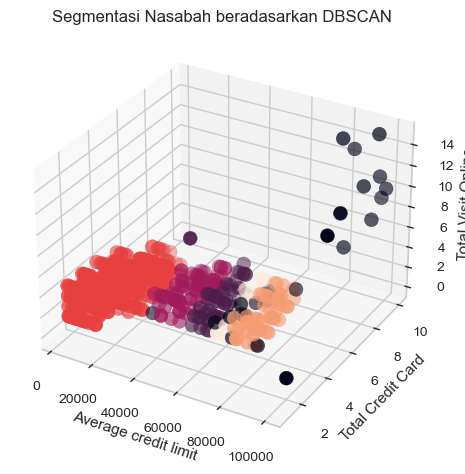

Silhouette score k-means: 0.657


In [40]:
DBSC = DBSCAN(min_samples=20, eps=2500)
DBSC_clusters = DBSC.fit_predict(credit_clean)

from matplotlib.colors import ListedColormap

cmap=ListedColormap(sns.color_palette("rocket",256).as_hex())
fig=plt.figure()
ax=plt.axes(projection='3d')

ax.scatter(credit_clean['Avg_Credit_Limit'], credit_clean['Total_Credit_Cards'],credit_clean['Total_visits_online'], c=DBSC_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah beradasarkan DBSCAN')
ax.set_xlabel('Average credit limit')
ax.set_ylabel('Total Credit Card')
ax.set_zlabel('Total Visit Online')
plt.show()

print("Silhouette score k-means: %0.3f" % silhouette_score(credit_clean,DBSC_clusters))

In [41]:
import pickle

with open('KMeans_model.pkl','wb') as r:
    pickle.dump((kmeans),r)
    
with open('AGG_model.pkl','wb')as r:
    pickle.dump((AGG),r)

with open('DBSCAN_model.pkl','wb')as r:
    pickle.dump((DBSC),r)
    
print("Model berhasil disimpan")        

Model berhasil disimpan
